# **Parcial I: Física Computacional I. Semestre 2021-2**

**Nombre:** 

**Código:** 

## **Problema 1**
En un libro titulado **Looking at History Through Mathematics**, se considera
un modelo para un problema que involucra la generación de inconformes en la sociedad. Supongamos que una sociedad tiene una población de individuos $x(t)$ en el momento $t$, en años, y que todos los inconformes que se unen con otros inconformistas tienen descendencia que también es inconformista, mientras que una proporción fija $r$ de todos los demás descendientes también son inconformistas. Si se supone que las tasas de natalidad y mortalidad de todos los individuos son las constantes $b$ y $d$, respectivamente, y si los conformistas y los inconformistas se emparejan al azar, el problema se puede expresar mediante las siguientes ecuaciones diferenciales
 
\begin{equation*}
    \frac{dx(t)}{dt} = (b - d) x(t), \;\;\;\;\;\;\; \frac{dx_n(t)}{dt} = (b - d) x_n(t) + rb(x(t) - x_n(t))
\end{equation*}

donde $x_n(t)$ es el número de no-conformistas en la población en un tiempo t.

* **(1.0)** Suponga que la variable $p(t) = x_n(t)/x(t)$ se introduce para representar la proporción de inconformistas en la sociedad en el tiempo t. Encuentre una expresión que combine estas dos ecuaciones y simplifíquela, de tal manera que obtenga una única ecuación diferencial en términos de $p(t)$
    
* **(1.0)** Asumiendo que $p(0)=0.01$, $b = 0.02$, $d=0.015$ y $r=0.1$, encuentre la solución aproximada usando RK4 desde $t=0$ hasta $t=50$ con un tamaño de paso de $h =$ 1 año.

* **(1.0)** Resuelva la ecuación diferencial para $p(t)$ analíticamente y compare los resultados en la parte (2) cuando t = 50.

##### Primer punto

Dado $p(t) = x_n(t)/x(t)$, consideremos su derivada respecto al tiempo:

\begin{equation}
\frac{dp}{dt} = \frac{d}{dt} \left(\frac{x_n(t)}{x(t)}\right) = \frac{\dot{x_n}x - \dot{x}x_n}{x^2}
\end{equation}

Sustituyendo los valores que tenemos para las derivadas de $x$ y $x_n$, tenemos que la expresión queda:

\begin{equation}
\frac{dp}{dt} = \frac{ [(b - d) x_n(t) + rb(x(t) - x_n(t)] x - [(b-d)x] x_n}{x^2}
\end{equation}

Cancelando los términos que incluyen $(b-d)$:

\begin{equation}
\frac{dp}{dt} = \frac{rbx (x-x_n)}{x^2} = \frac{rb}{x} (x-x_n) = rb \left(1-\frac{x_n(t)}{x(t)}\right)
\end{equation}

Finalmente, sustituimos la definición de p y la ecuación diferencial queda:

\begin{equation}
\frac{dp}{dt} = rb (1-p(t))
\end{equation}

##### Segundo punto

Definamos la función para ejecutar RK4 y nuestra función correspondiente a la ecuación diferencial:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Valores de las constantes
b = 0.02
d = 0.015
r = 0.1

# Definición de la ecuación. La ecuación diferencial no tiene dependencia explícita del tiempo
inconformes = lambda p: r*b*(1-p)

# Función para solucionar por RK4
def rk4(f, inicio, tiempo, h):
    """
    Soluciona una ecuación diferencial de una variable por el método de Runge-Kutta de 
    cuarto orden.
    f: función de la derivada
    inicio: array, tupla o lista con las condiciones iniciales. El primer elemento corresponde
    al tiempo inicial, los términos posteriores corresponden con el estado inicial del sistema.
    tiempo: float, tiempo final
    h: paso
    """
    
    T = np.arange(inicio[0], tiempo+h, h)
    Y = np.zeros(len(T))
    Y[0] = inicio[1]
    
    # Aplica Runge-Kutta de orden 4
    for i in range(len(T)-1):
        # Define los coeficientes
        # La ecuación diferencial no tiene dependencia explícita del tiempo
        k1 = f(Y[i])
        k2 = f(Y[i] + h*k1/2)
        k3 = f(Y[i] + h*k2/2)
        k4 = f(Y[i] + h*k3)
        # Calcula el resultado final
        Y[i+1] = Y[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    
    return T, Y

In [3]:
# t0 = 0, p0 = 0.01
t4, r4 = rk4(inconformes, [0, 0.01], 50, 1)

##### Tercer punto

La ecuación diferencial se puede resolver por separación de variables y una integral, con lo que se tiene que la solución es:

\begin{equation}
p = 1- e^{-rbt} + C
\end{equation}

donde C es la constante de integración, la cual en este caso, por las condiciones iniciales,  tiene un valor de $C = 0.01$

Finalmente, implementemos la solución analítica y comparemos los resultados mediante una gráfica:

In [4]:
inconformes_t = lambda t: 1-np.exp(-r*b*t)+0.01
rt = inconformes_t(t4)

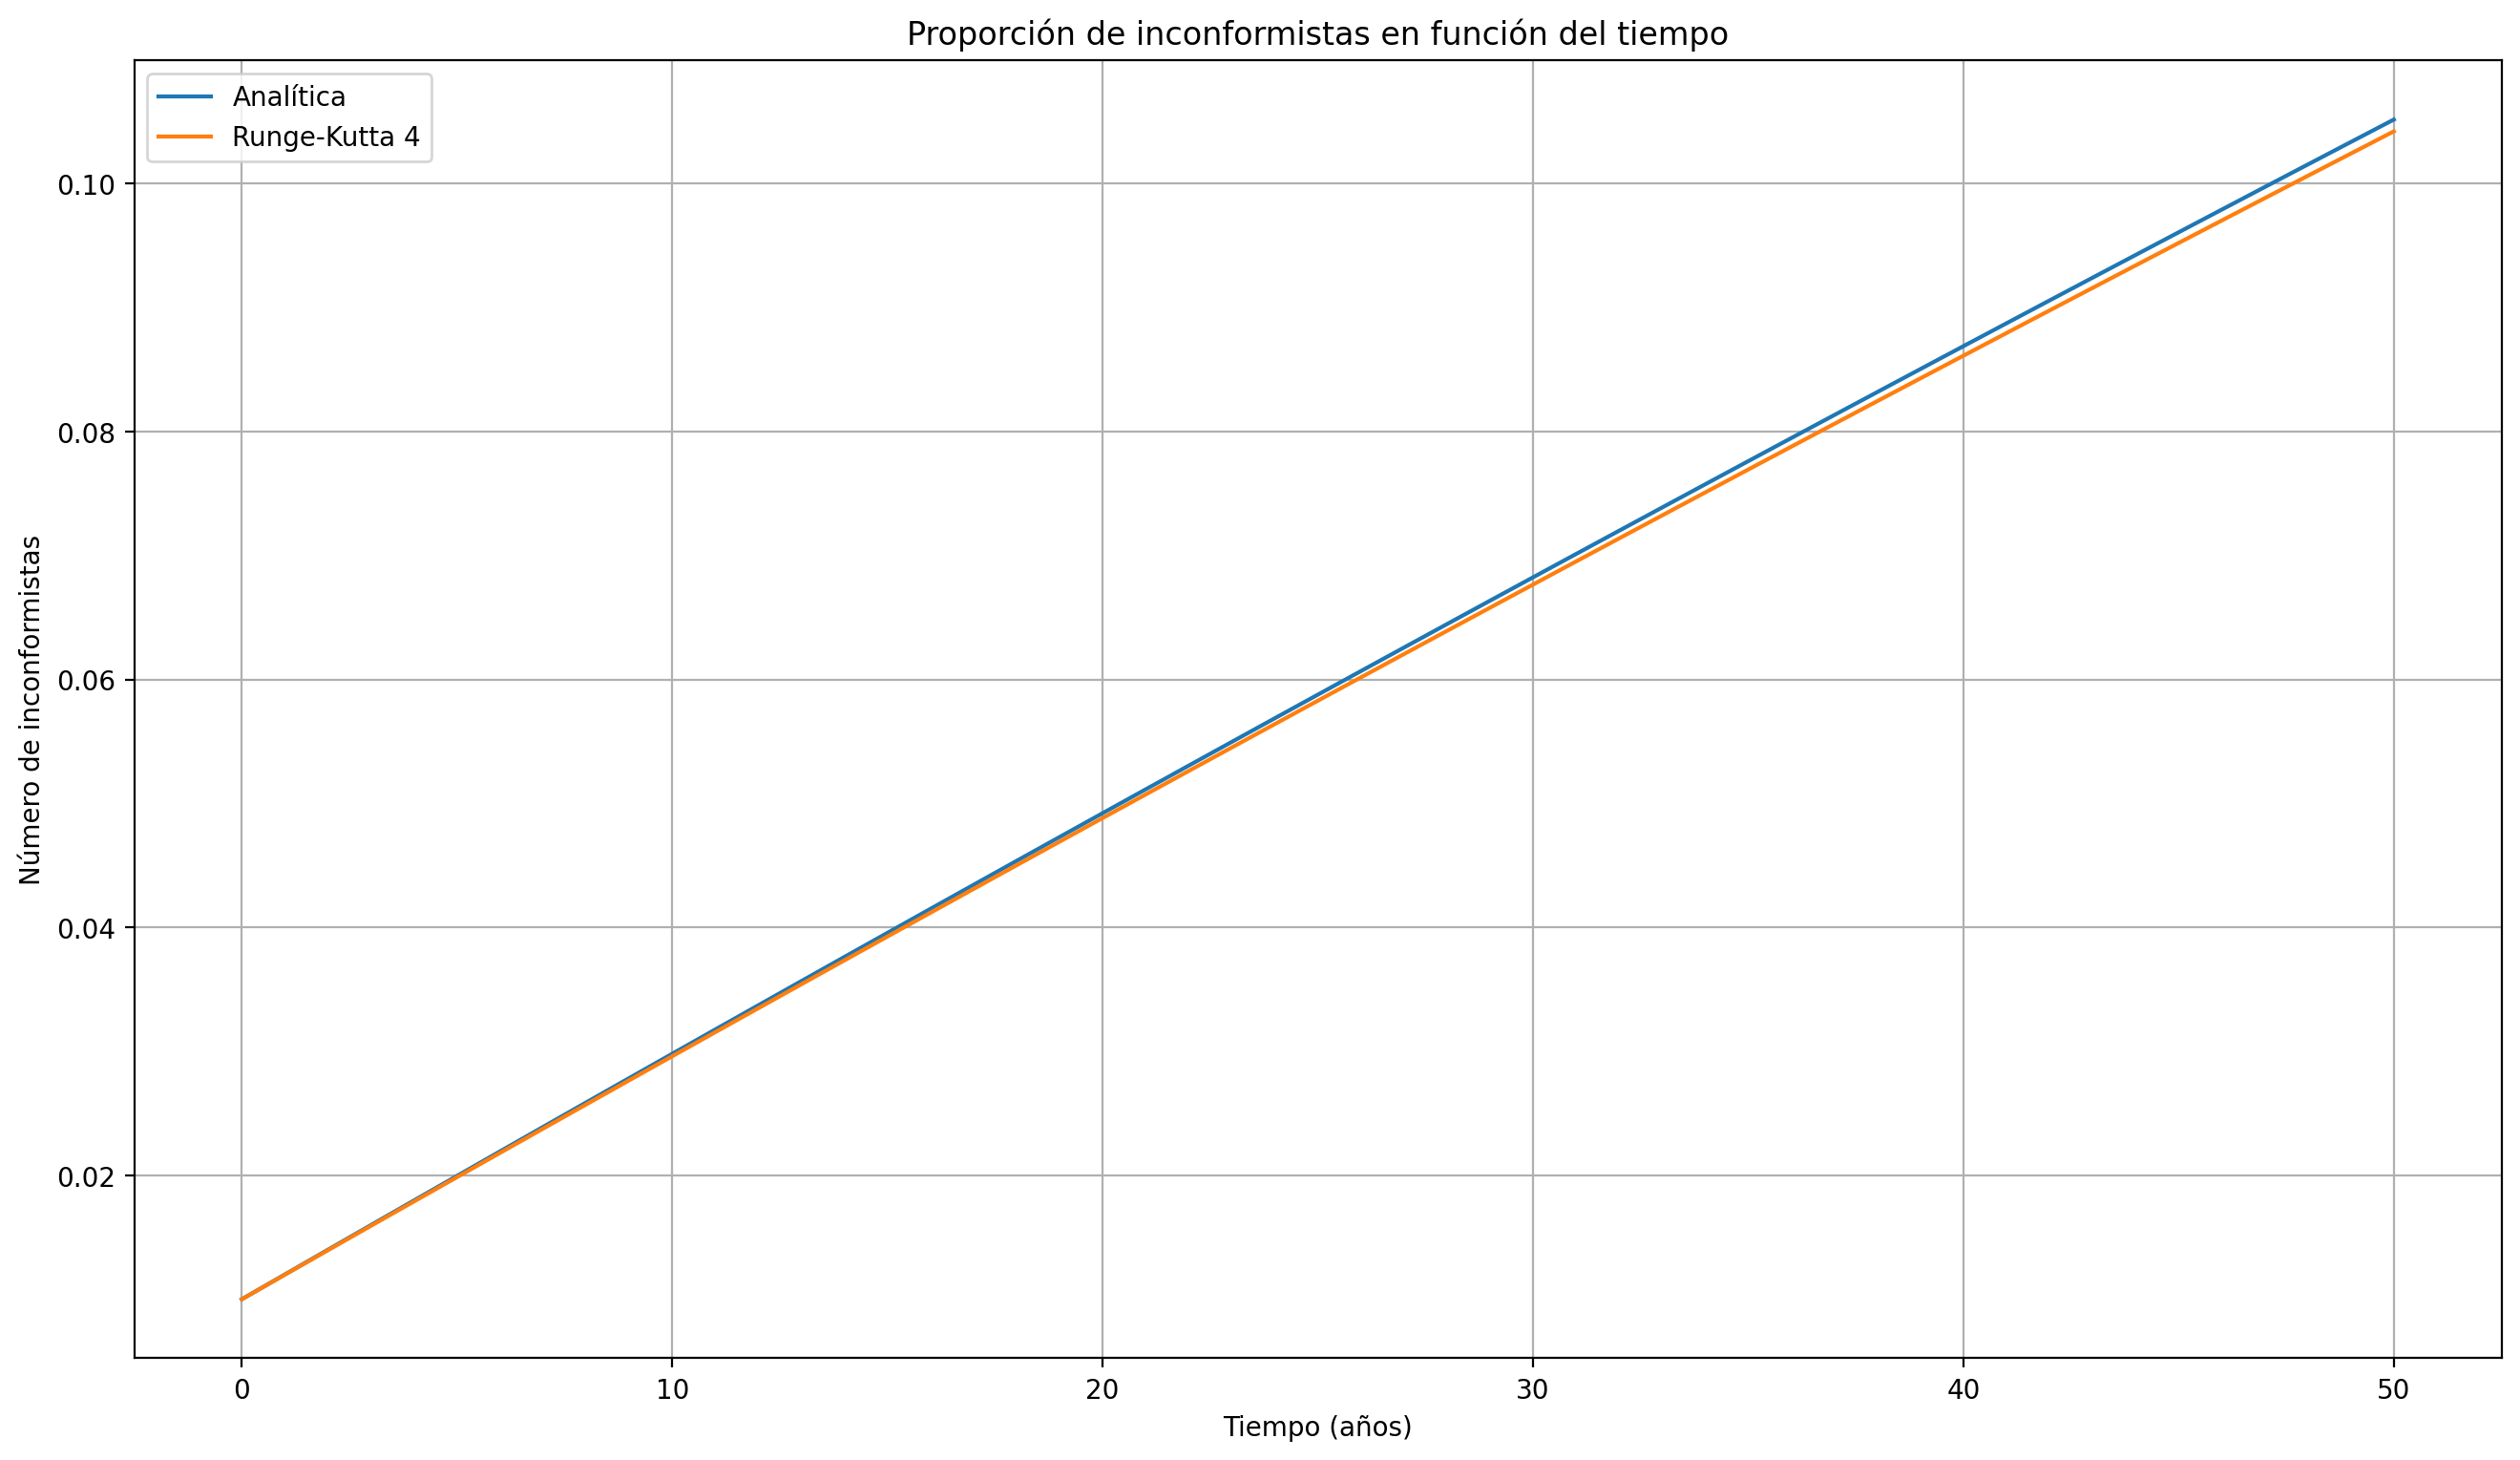

In [5]:
plt.figure(figsize=(16,9), dpi=200)
plt.title("Proporción de inconformistas en función del tiempo")
plt.xlabel("Tiempo (años)")
plt.ylabel("Número de inconformistas")
plt.grid()

plt.plot(t4, rt, label="Analítica")
plt.plot(t4, r4, label = "Runge-Kutta 4")
plt.legend()

In [6]:
print(f"El valor obtenido cuando t = 50 para la solución analítica es {rt[50]:.6f}, mientras que para Runge-Kutta es {r4[50]:.6f}.")
print(f"De esta manera, el error de la solución es {abs(rt[50]-r4[50]):.6f}.")

El valor obtenido cuando t = 50 para la solución analítica es 0.105163, mientras que para Runge-Kutta es 0.104211.
De esta manera, el error de la solución es 0.000952.


El valor obtenido por Runge-Kutta 4 es menor al analítico y va aumentando a medida que avanza el tiempo.

## **Problema 2**
**(2.0)** Dado el siguiente problema de valor inicial $y' = y(y - t)$, $0 < t < 1.2$, $y(0) = 1$. Use el método de predictor-corrector el cual usa el método de Euler modificado 

$$w_{i+1} = w_i + \dfrac{h}{2}[f(t_i , wi) + f(t_{i+1} , w_i + hf(t_i , w_i))]$$

y un método de Adam-Moulton de un paso

$$w_{i+1} = w_i + \dfrac{h}{2}[f(t_i , wi) + f(t_{i+1} , w_{i+1})]$$

para aproximar $y(1.2)$ con $h = 0.6$.  

Imprima el resultado y realice comentarios en la ejecución del código

In [7]:
f = lambda t, y: y*(y-t)

def abm(f, inicio, tiempo, h):
    """
    Soluciona una ecuación diferencial de una variable por un método predictor-corrector
    basado en una predicción por Euler mejorado y una corrección por Adams-Moulton.
    f: función de la derivada
    inicio: array, tupla o lista con las condiciones iniciales. El primer elemento corresponde
    al tiempo inicial.
    tiempo: float, tiempo final
    h: paso
    """
    
    T = np.arange(inicio[0], tiempo+h, h)
    Y = np.zeros(len(T))
    Y[0] = inicio[1]
    
    # No es necesario hacer cálculos previos, tan solo se necesita la condición inicial para aplicar Euler mejorado
    
    for i in range(len(T)-1):
        # Calculamos el paso predecido haciendo uso de Euler
        w4p = Y[i] + h/2*(f(T[i], Y[i]) + f(T[i]+h, Y[i] + h*f(T[i], Y[i])))
        
        # Corregimos el paso haciendo uso de Adams-Moulton y lo usamos como solución
        Y[i+1] = Y[i] + h/2*(f(T[i], Y[i]) + f(T[i] + h, w4p))
    return T, Y

In [8]:
tt, yy = abm(f, [0, 1], 1.2, 0.6)

In [9]:
resultado = pd.DataFrame({"Tiempo" : tt, "Valor" : yy})

In [10]:
resultado

,Tiempo,Valor
0,0.0,1.00000
1,0.6,1.93012
2,1.2,8.57111


Así, el valor aproximado de $y(1.2)$ cuando $h=0.6$ es $y(1.2) = 8.57111$